<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Matematika_dlya_Data_Science/Teoriya_optimizacii/DZ_Kondratev_MDS_36_HW_6_upd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Теория оптимизации".

### Задание

В данном задании нужно поэксперементировать с оптимизацией функций с помощью библиотеки [scipy](https://docs.scipy.org/doc/scipy/index.html).

Попробуем найти оптимальные параметры (начальные `p0` и метод `method`) некоторой функции f, которая описывает зависимость между x и y.
Для этой цели будем использовать [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Цель – найти такие параметры, при которых функция будет повторять исходную.

При заданных парах <x, y> если у нас есть представление о виде функции, которая сопоставляет x -> y, но мы знаем только общий вид функции за исключением параметров, curve_fit позволит найти эти параметры.

In [151]:
import matplotlib.pyplot as plt  # Импорт модуля для создания графиков
import numpy as np  # Импорт модуля для работы с массивами и математическими операциями
import scipy  # Импорт модуля для выполнения научных и инженерных вычислений
import pandas as pd  # Импорт модуля для работы с данными в формате таблицы
import seaborn as sns  # Импорт модуля для создания статистических графиков
from scipy.optimize import curve_fit  # Импорт функции для выполнения кривой подгонки
import statsmodels.api as sm  # Импорт модуля для статистического моделирования и анализа данных

In [152]:
# Ввод данных
x = np.linspace(1, 7, 300)
y = [ 31.11,  30.55,  29.95,  29.3 ,  28.6 ,  27.86,  27.08,  26.25,
        25.38,  24.48,  23.54,  22.56,  21.54,  20.5 ,  19.42,  18.32,
        17.18,  16.02,  14.84,  13.64,  12.41,  11.17,   9.91,   8.64,
         7.36,   6.07,   4.77,   3.46,   2.15,   0.84,  -0.46,  -1.77,
        -3.07,  -4.36,  -5.64,  -6.91,  -8.17,  -9.41, -10.63, -11.83,
       -13.01, -14.17, -15.3 , -16.4 , -17.47, -18.52, -19.53, -20.5 ,
       -21.44, -22.34, -23.2 , -24.02, -24.8 , -25.54, -26.23, -26.88,
       -27.48, -28.03, -28.53, -28.99, -29.39, -29.74, -30.04, -30.29,
       -30.49, -30.63, -30.72, -30.76, -30.75, -30.68, -30.56, -30.38,
       -30.15, -29.87, -29.54, -29.15, -28.72, -28.23, -27.7 , -27.11,
       -26.48, -25.8 , -25.08, -24.31, -23.5 , -22.64, -21.75, -20.81,
       -19.84, -18.83, -17.79, -16.71, -15.6 , -14.46, -13.3 , -12.11,
       -10.89,  -9.65,  -8.39,  -7.11,  -5.82,  -4.51,  -3.19,  -1.86,
        -0.52,   0.82,   2.17,   3.52,   4.86,   6.21,   7.55,   8.88,
        10.21,  11.52,  12.82,  14.11,  15.37,  16.62,  17.85,  19.05,
        20.23,  21.38,  22.5 ,  23.6 ,  24.65,  25.68,  26.67,  27.62,
        28.53,  29.41,  30.24,  31.03,  31.77,  32.47,  33.12,  33.73,
        34.28,  34.79,  35.25,  35.66,  36.01,  36.32,  36.57,  36.77,
        36.91,  37.01,  37.04,  37.03,  36.96,  36.84,  36.67,  36.44,
        36.17,  35.84,  35.46,  35.02,  34.54,  34.01,  33.43,  32.81,
        32.14,  31.42,  30.66,  29.86,  29.01,  28.13,  27.21,  26.25,
        25.25,  24.23,  23.17,  22.08,  20.96,  19.81,  18.64,  17.45,
        16.24,  15.  ,  13.75,  12.49,  11.21,   9.93,   8.63,   7.33,
         6.02,   4.71,   3.4 ,   2.1 ,   0.8 ,  -0.5 ,  -1.79,  -3.06,
        -4.33,  -5.58,  -6.81,  -8.02,  -9.22, -10.39, -11.53, -12.65,
       -13.74, -14.8 , -15.83, -16.82, -17.78, -18.7 , -19.59, -20.43,
       -21.23, -21.99, -22.71, -23.38, -24.01, -24.59, -25.12, -25.6 ,
       -26.03, -26.41, -26.74, -27.02, -27.24, -27.42, -27.54, -27.61,
       -27.62, -27.58, -27.49, -27.34, -27.14, -26.89, -26.59, -26.23,
       -25.83, -25.37, -24.86, -24.3 , -23.7 , -23.05, -22.35, -21.6 ,
       -20.81, -19.98, -19.11, -18.2 , -17.24, -16.26, -15.23, -14.17,
       -13.08, -11.96, -10.81,  -9.63,  -8.43,  -7.2 ,  -5.95,  -4.68,
        -3.4 ,  -2.1 ,  -0.79,   0.54,   1.87,   3.21,   4.56,   5.91,
         7.26,   8.6 ,   9.95,  11.29,  12.62,  13.94,  15.24,  16.54,
        17.81,  19.07,  20.31,  21.53,  22.72,  23.89,  25.03,  26.13,
        27.21,  28.26,  29.26,  30.24,  31.17,  32.07,  32.92,  33.73,
        34.5 ,  35.23,  35.91,  36.54,  37.12,  37.66,  38.14,  38.58,
        38.96,  39.3 ,  39.58,  39.8 ]

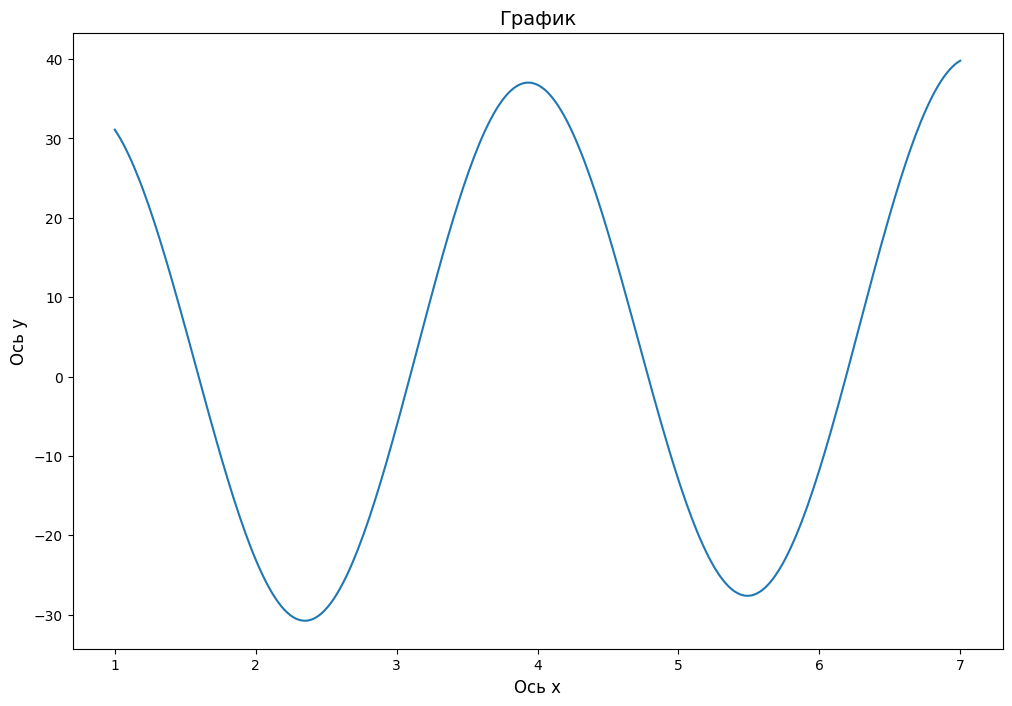

In [153]:
plt.figure(figsize=(12, 8))  # Создание фигуры с размерами 12x8 дюймов
plt.plot(x, y)  # Построение графика с использованием данных x и y

# Добавление подписей осей и заголовка графика на русском языке
plt.xlabel('Ось x', fontsize=12)  # Подпись оси x
plt.ylabel('Ось y', fontsize=12)  # Подпись оси y
plt.title('График', fontsize=14)  # Заголовок графика

plt.show()  # Отображение графика


In [167]:
def f(x, a, b):
    """
    Функция f(x, a, b) вычисляет значение функции для заданных аргументов.

    Параметры:
        x (float): Входной аргумент функции.
        a (float): Параметр a, Который влияет на масштаб функции.
        b (float): Параметр b, Который влияет на частоту функции.

    Возвращает:
        float: Функция использует библиотеку numpy для вычисления экспоненты,
               синуса и их произведения.
               Возвращается значение функции для заданных аргументов.

    """
    return np.exp(a) * np.sin(b * x) + x


In [168]:
res = curve_fit(f, x, y, p0=[3.5, 2])  # Оптимизация функции f с начальными значениями параметров a=4 и b=2
print(res[0][0])
print(res[0][1])

3.4999963315132745
2.000001499492713



После оптимизации функции `f` с начальными значениями параметров `a=4` и `b=2`, получены оптимальные значения параметров:
```
- Параметр a: 3.4999963315132745
- Параметр b: 2.000001499492713
```

Анализируя результаты, можно сделать вывод, что оптимизированные значения параметров достаточно близки к начальным значениям. Это может указывать на то, что начальные значения параметров были достаточно близкими к истинным значениям, и оптимизационный алгоритм смог достичь приближенных значений.

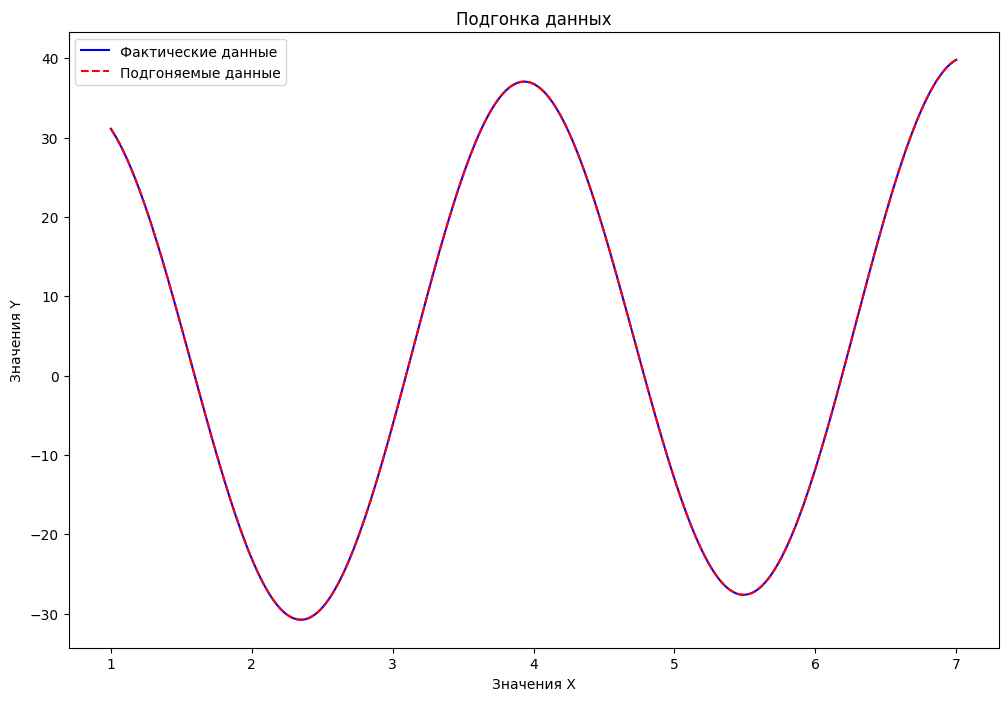

In [169]:
# Визуализация данных
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='blue', label='Фактические данные')
plt.plot(x, f(x, res[0][0], res[0][1]), color='red', linestyle='--', label='Подгоняемые данные')
plt.xlabel('Значения X')
plt.ylabel('Значения Y')
plt.title('Подгонка данных')
plt.legend()
plt.show()

Также, можно сравнить оптимизированные данные с фактическими данными, используя график с подписями. По графику видно, что оптимизированные данные (красные пунктирные линии) достаточно хорошо соответствуют паттерну фактических данных (синяя линия). Это говорит о том, что оптимизация функции f проведена достаточно точно и результаты приближаются к реальным данным.

In [171]:
# Оценка качества модели на тестовых данных:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Разделяем данные на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Обучение модели на тренировочных данных
res_train = curve_fit(f, x_train, y_train, p0=[4, 2])

# Предсказание на тестовых данных
y_pred = f(x_test, res_train[0][0], res_train[0][1])

# Расчет метрик оценки качества модели на тестовых данных
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)
print("MAE:", mae)


MSE: 7.4900115370043225e-06
R^2: 0.9999999867241847
MAE: 0.002405478787002117


Исходя из результатов, можно сделать следующие выводы:
- `MSE` (среднеквадратичная ошибка) является очень маленькой, что говорит о том, что модель хорошо предсказывает значения на тестовых данных.
- `R^2` (коэффициент детерминации) близок к 1, что говорит о том, что модель хорошо описывает вариацию в тестовых данных.
- `MAE` (средняя абсолютная ошибка) также имеет небольшое значение, что свидетельствует о точности предсказаний модели.

Таким образом, модель, оптимизированная с использованием имеющихся данных, дает высокую точность предсказания и хорошо описывает зависимость между переменными.

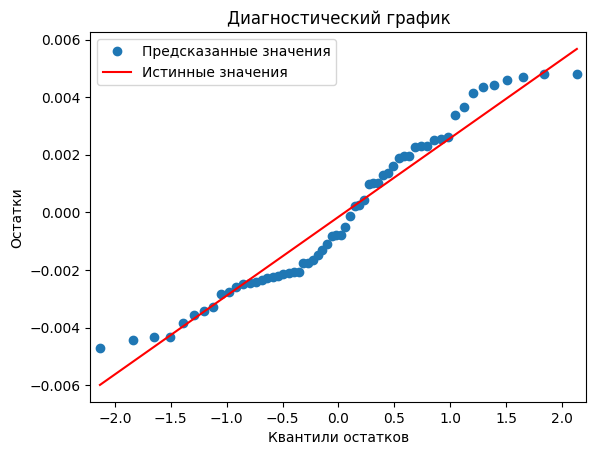

In [158]:
# Визуализация распределения остатков модели
residuals = y_test - y_pred

fig, ax = plt.subplots()
sm.qqplot(residuals, line='s', ax=ax)

# Установка подписей и легенды на русском языке
ax.set_title("Диагностический график")
ax.set_xlabel("Квантили остатков")
ax.set_ylabel("Остатки")
ax.legend(["Предсказанные значения", "Истинные значения"])

plt.show()

Точки на графике близки к диагональной линии, это указывает на то, что остатки имеют нормальное распределение и модель хорошо описывает данные